<a name="topo"></a>


# Sumário

1. [O Naufrágio do Titanic](#titanic)
2. [Análise Exploratória de Dados (AED)](#aed)
3. [Visualização de Dados](#vidados)
4. [Engenharia de Recursos](#engenharia)
5. [Machine Learning](#ml)
6. [Validação Cruzada _(Cross-Validation)_](#cv)
7. [Matriz de Confusão](#matrix)
8. [Curvas ROC e AUC](#rocauc)
9. [Customização de Hyper-Parâmetros](#hyperparam)
10. [Ensembling](#ensembling)
11. [Importância de Recursos](#fimportance)
12. [Submissão](#submissao)


<a name="titanic"></a>


# O Naufrágio do Titanic

<img src="titanic.jpg" width=100%>

O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

Página da Competição: https://www.kaggle.com/c/titanic

Fontes de Consulta:

- https://www.kaggle.com/startupsci/titanic-data-science-solutions
- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
- https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
- https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
- https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818
- https://www.kaggle.com/cdeotte/titantic-mega-model-0-84210
- https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688
- https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
- https://www.kaggle.com/reisel/save-the-families
- https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
  <br>

[início](#topo)


<a name="aed"></a>


## Análise Exploratória de Dados (AED)

Esse passo é essencial, pois é através dele que iremos construir um entendimento intuitivo dos dados, entender como os parâmetros estão relacionados, procurar e encontrar tendências e relações entre diferentes parâmetros.

<br>

[início](#topo)


### Importar bibliotecas


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Ler train e test


In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index


In [3]:
train.set_index('PassengerId', inplace=True)

In [4]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois


In [5]:
train.shape, test.shape

((891, 11), (418, 10))

In [6]:
data = pd.concat([train, test], sort=True)

In [7]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [8]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


### Parâmetros Categóricos <a name="nom"></a>

- ### Nominais


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1046 non-null   float64
 1   Cabin     295 non-null    object 
 2   Embarked  1307 non-null   object 
 3   Fare      1308 non-null   float64
 4   Name      1309 non-null   object 
 5   Parch     1309 non-null   int64  
 6   Pclass    1309 non-null   int64  
 7   Sex       1309 non-null   object 
 8   SibSp     1309 non-null   int64  
 9   Survived  891 non-null    float64
 10  Ticket    1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [10]:
# Sex, Embarked, Survived

<a name="ord"></a>


- ### Ordinais


In [11]:
# Pclass

<a name="paranum"></a>


### Parâmetros Numéricos <a name="cont"></a>

- ### Contínuos


In [12]:
# Age, Fare

<a name="disc"></a>


- ### Discretos


In [13]:
# Parch, SibSp

<a name="paraalfa"></a>


### Parâmetros Alfanuméricos


In [14]:
# Ticket

<a name="missing"></a>


### Dados incompletos (faltando dados)


In [15]:
data.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

<a name="numinfo"></a>


### Preencher Embarque com Moda


In [16]:
mode = data['Embarked'].mode()[0]

In [17]:
data['Embarked'].fillna(mode, inplace=True)

/tmp/ipykernel_76207/3557902452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(mode, inplace=True)


### Informações Gerais (Parâmetros Numéricos)


In [18]:
data.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


<a name="catinfo"></a>


### Informações Gerais de Parâmetros Categóricos


In [19]:
data.describe(include=[object])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,916,2,843,11


<a name="infoamostra"></a>


## Informações da Amostra

<br>

[início](#topo)


### Tamanho da Amostra


In [20]:
len(data)

1309

### Proporção Total da Amostra em relação à População


In [21]:
len(train)/2224

0.4006294964028777

### Proporção de Sobreviventes (População)


In [22]:
1-1502/2224

0.32464028776978415

### Proporção de Sobreviventes (Amostra)


In [23]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
342/len(train)

0.3838383838383838

<a name="agrupamentos"></a>


# Agrupamentos

<br>

[início](#topo)


### Agrupar Classe x Sobrevivência


In [25]:
data[['Survived']].groupby(data['Pclass']).mean(
).sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- Passageiros de Primeira Classe são muito mais propensos a sobreviver do que de Segunda e Terceira Classe
- Passageiros de Segunda Classe são menos propensos a sobreviver do que de Primeira Classe, mas são mais propensos a sobreviver do que de Terceira Classe


### Agrupar Sexo x Sobrevivência


In [26]:
data[['Survived']].groupby(data['Sex']).mean(
).sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


- 74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra


### Agrupar IrmaosConjuge x Sobrevivência


In [27]:
data[['Survived']].groupby(data['SibSp']).mean(
).sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos x Sobrevivência


In [28]:
data[['Survived']].groupby(data['Parch']).mean(
).sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


### Correlação de IrmaosConjuge e PaisFilhos


In [29]:
x = data[['SibSp', 'Parch']]
x.corr()

,SibSp,Parch
SibSp,1.000000,0.373587
Parch,0.373587,1.000000


- IrmaosConjuge e PaisFilhos não possuem uma correlação muito forte. Talvez seja o caso juntá-los como um único recurso depois


<a name="vidados"></a>


# Visualização de Dados

Observar os dados de forma visual para averiguar as suposições feitas até agora

<br>

[início](#topo)


### Gráfico de Barras e Pizza de Sobreviventes


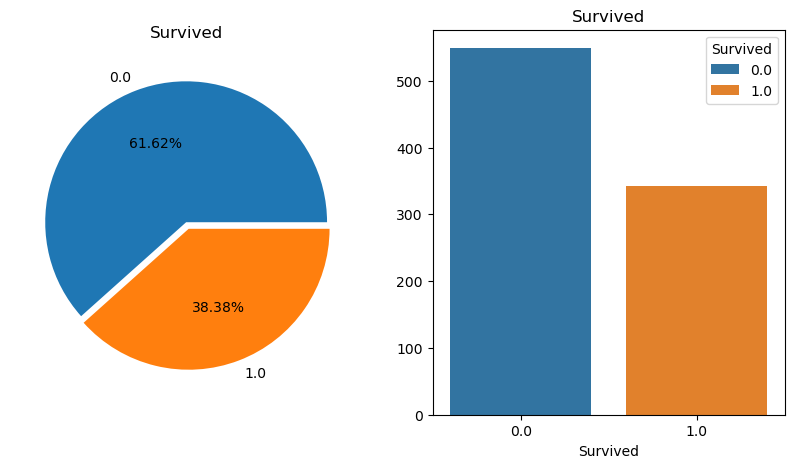

In [30]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.05], autopct='%0.2f%%', ax=ax[0])  # type:ignore
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data, x='Survived', ax=ax[1], hue="Survived")
ax[1].set_title('Survived')
ax[1].set_ylabel('')
plt.show()

## Sobrevivência Por Sexo


In [31]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

In [32]:
data.loc[data['Sex'] == 'female']['Survived'].value_counts()

Survived
1.0    233
0.0     81
Name: count, dtype: int64

<a name="barrassob"></a>


### Gráfico de Barras de Sobreviventes por Sexo


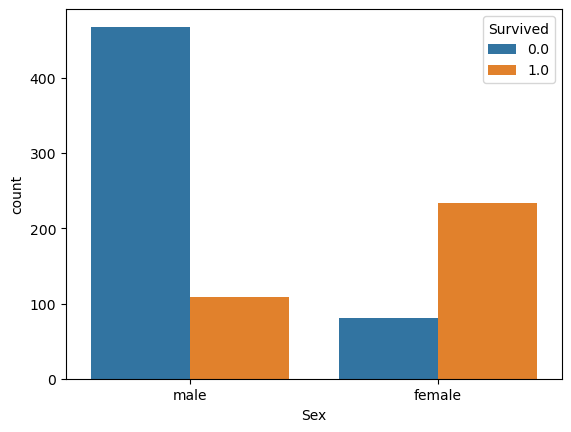

In [33]:
sns.countplot(data, x='Sex', hue='Survived')
plt.show()

<a name="histidsob"></a>


### Histograma de Idade x Sobreviveu


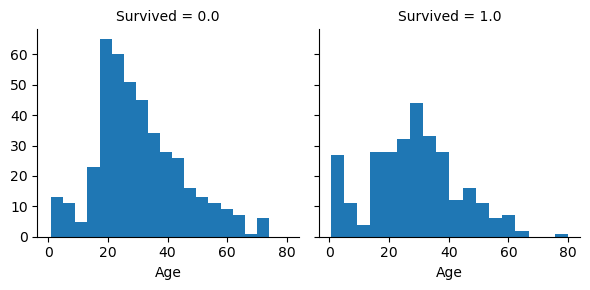

In [34]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=18)
plt.show()

- Crianças sobreviveram mais
- Passageiro mais idoso sobreviveu
- A maioria dos passageiros estão na faixa de 18-35 anos (E a maioria não sobreviveu)


<a name="histclassidsob"></a>


### Histograma de Idade x Classe x Sobreviveu com FacetGrid


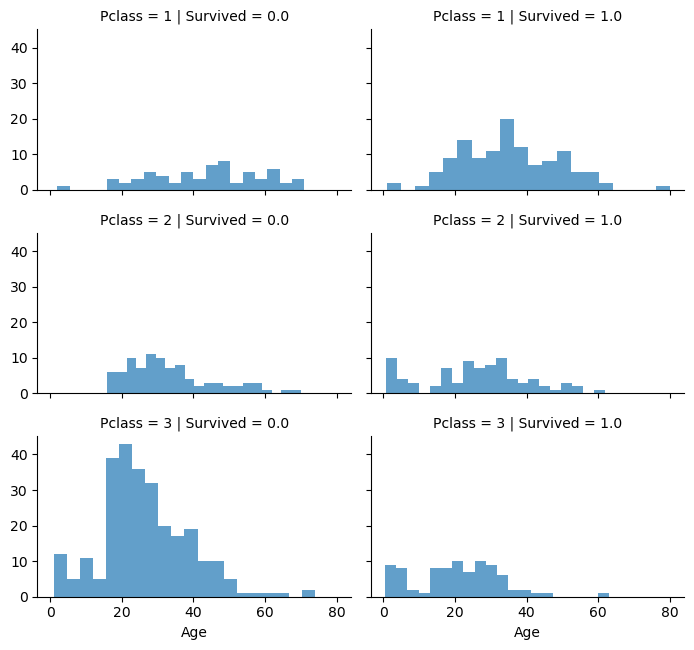

In [35]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass',
                     height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.7, bins=20)
plt.show()

<a name="chancesporto"></a>


### Chances de Sobrevivência por Porto de Embarque


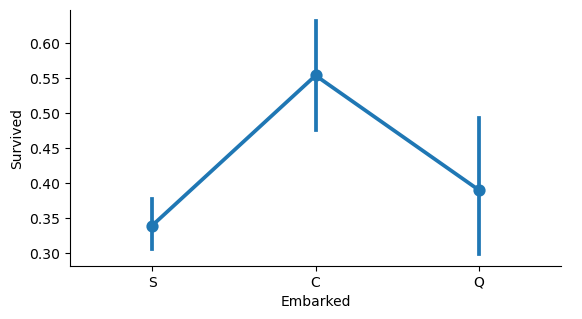

In [36]:
sns.catplot(data, x='Embarked', y='Survived', kind='point')
fig = plt.gcf()
fig.set_size_inches(6, 3)
plt.show()

<a name="pointplotembarque"></a>


### Embarque x Classe x Sobreviveu


/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


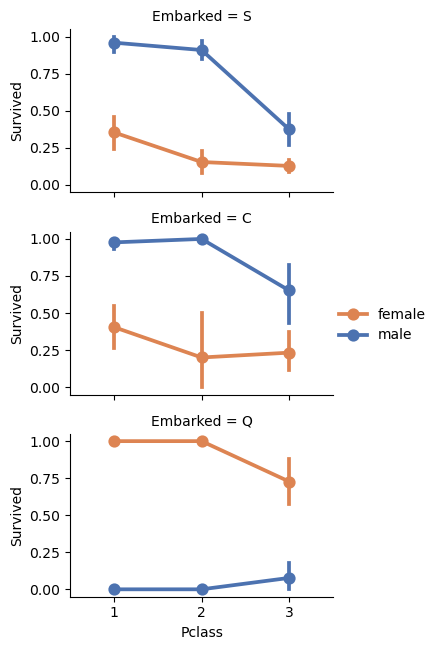

In [37]:
grid = sns.FacetGrid(data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

### Agrupar mulheres por sobrevivência


In [38]:
data[['Survived', 'Age', 'Fare', 'Parch', 'Pclass', 'SibSp']
     ].loc[data['Sex'] == 'female'].groupby('Survived').mean()

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


### Agrupar homens por sobrevivência


In [39]:
data[['Survived', 'Age', 'Fare', 'Parch', 'Pclass', 'SibSp']
     ].loc[data['Sex'] == 'male'].groupby('Survived').mean()

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


<a name="graficobarras"></a>


### Gráfico de Barras Sexo x Tarifa por Sexo

<br>

[início](#topo)


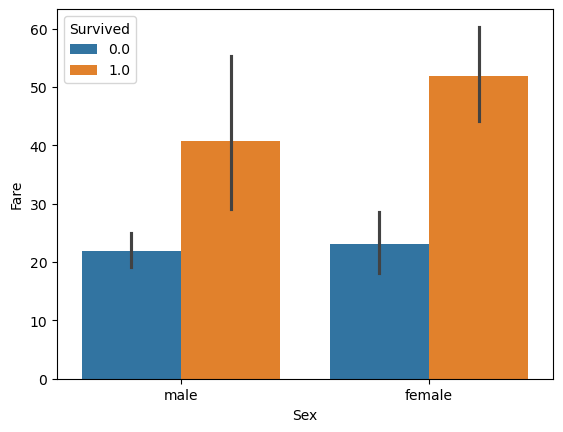

In [40]:
sns.barplot(data, x='Sex', y='Fare', hue='Survived')
plt.show()

<a name="graficobarrassex"></a>


### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu


/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


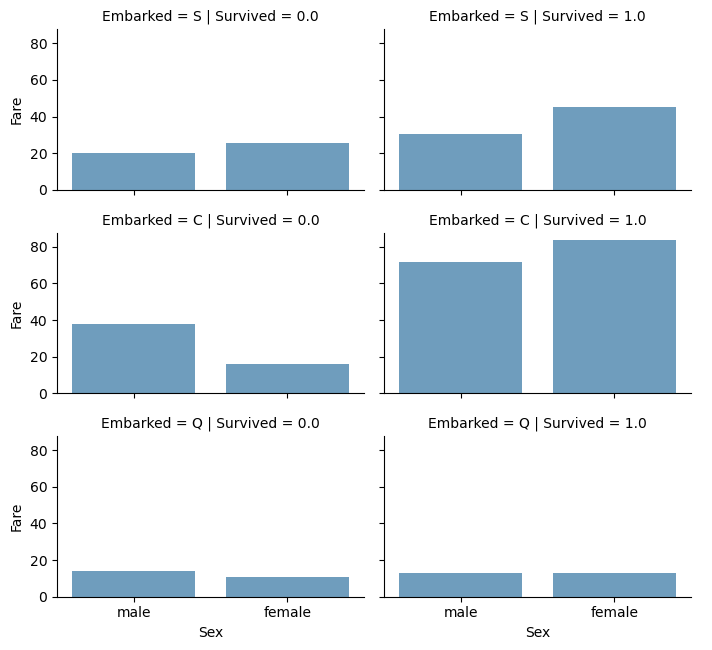

In [41]:
grid = sns.FacetGrid(data, col='Survived', row='Embarked',
                     height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.7, errorbar=None)
grid.add_legend()
plt.show()

<a name="pizza"></a>


### Crosstab de Sobrevivência por Classe


In [42]:
pd.crosstab(data['Survived'], data['Pclass'],
            margins=True).style.background_gradient(cmap='OrRd')

Pclass,1,2,3,All
Survived,,,,
0.000000,80,97,372,549
1.000000,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>


## Visualizando Dados Faltando

<br>

[início](#topo)


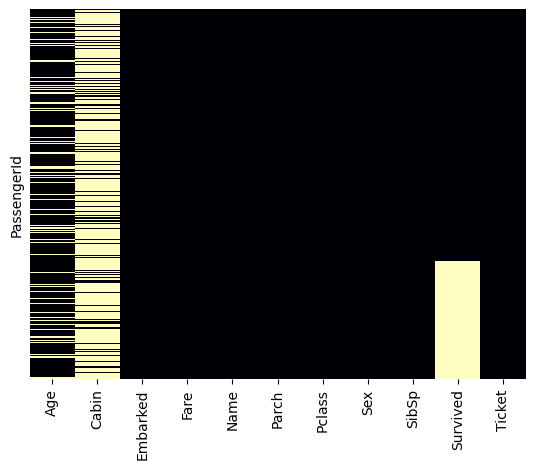

In [43]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

### Remover Cabine


In [44]:
data.drop(['Cabin'], axis=1, inplace=True)

<a name="boxplot"></a>


### Boxplot de Classe por Sexo


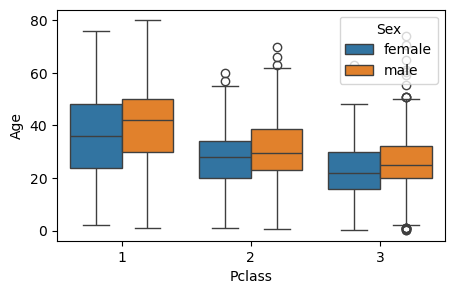

In [45]:
plt.figure(figsize=(5, 3), dpi=100)
sns.boxplot(data, x='Pclass', y='Age', hue='Sex')
plt.show()

<a name="engenharia"></a>


# Engenharia de Recursos

<br>

[início](#topo)


### Extrair Titulo do Nome


In [46]:
data['Title'] = data['Name'].str.extract(r'([a-zA-Z]+)\.')

In [47]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [48]:
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [49]:
data['Title'] = data['Title'].apply(lambda x: 'Others' if x not in [
    'Miss',  'Master', 'Mr', 'Mrs'] else x)

In [50]:
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,260,0
Mr,0,757
Mrs,197,0
Others,9,25


# Mulheres e Crianças sobreviveram ou morreram juntos?


## Extrair sobrenome para identificar possíveis famílias


In [51]:
data['Name'].str.split(',').str[0]

PassengerId
1              Braund
2             Cumings
3           Heikkinen
4            Futrelle
5               Allen
            ...      
1305          Spector
1306    Oliva y Ocana
1307          Saether
1308             Ware
1309            Peter
Name: Name, Length: 1309, dtype: object

### Criar Feature Sobrenome da Família


In [52]:
data['Surname'] = data['Name'].str.split(',').str[0]

### Verificar as maiores famílias


In [53]:
data.groupby(['Surname'])['Name'].count().sort_values(ascending=False)

Surname
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Name, Length: 875, dtype: int64

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"


In [54]:
data[['Survived', 'Title', 'Surname', 'Ticket']].loc[data['Surname'] == 'Andersson']\
    .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')]

,Survived,Title,Surname,Ticket
PassengerId,,,,
69,1.0,Miss,Andersson,3101281
120,0.0,Miss,Andersson,347082
542,0.0,Miss,Andersson,347082
543,0.0,Miss,Andersson,347082
611,0.0,Mrs,Andersson,347082
814,0.0,Miss,Andersson,347082
851,0.0,Master,Andersson,347082
1106,NaN,Miss,Andersson,347091


### Mulheres e Crianças da Família "Sage"


In [55]:
data[['Survived', 'Title', 'Surname', 'Ticket']].loc[data['Surname'] == 'Sage']\
    .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')]

,Survived,Title,Surname,Ticket
PassengerId,,,,
160,0.0,Master,Sage,CA. 2343
181,0.0,Miss,Sage,CA. 2343
793,0.0,Miss,Sage,CA. 2343
864,0.0,Miss,Sage,CA. 2343
1080,NaN,Miss,Sage,CA. 2343
1252,NaN,Master,Sage,CA. 2343
1257,NaN,Mrs,Sage,CA. 2343


### Mulheres e Crianças da Família "Brown"


In [56]:
data[['Survived', 'Title', 'Surname', 'Ticket']].loc[data['Surname'] == 'Brown']\
    .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')]

,Survived,Title,Surname,Ticket
PassengerId,,,,
195,1.0,Mrs,Brown,PC 17610
346,1.0,Miss,Brown,248733
671,1.0,Mrs,Brown,29750
1067,NaN,Miss,Brown,29750
1248,NaN,Mrs,Brown,11769


### Criar DataFrame "MulherOuCrianca"


In [57]:
woman_or_child = data.loc[(data['Sex'] == 'female')
                          | (data['Title'] == 'Master')]

In [58]:
woman_or_child['Title'].unique()

array(['Mrs', 'Miss', 'Master', 'Others'], dtype=object)

### Criar Feature "TamanhoGrupo"

Referente a quantidade de Pessoas que possuem o mesmo sobrenome


In [59]:
woman_or_child.loc[woman_or_child['Surname'] == 'Brown']['Survived'].count()

3

In [60]:
data['GroupSize'] = data['Surname'].apply(
    lambda x: woman_or_child.loc[woman_or_child['Surname'] == x]['Survived'].count())

### Sobrevivência Família "Andersson"


In [61]:
data[['GroupSize', 'Surname', 'Title', 'Survived']].sort_values(
    by='GroupSize', ascending=False).head(10)

,GroupSize,Surname,Title,Survived
PassengerId,,,,
1212,7,Andersson,Mr,NaN
69,7,Andersson,Miss,1.0
611,7,Andersson,Mrs,0.0
120,7,Andersson,Miss,0.0
147,7,Andersson,Mr,1.0
1106,7,Andersson,Miss,NaN
814,7,Andersson,Miss,0.0
543,7,Andersson,Miss,0.0
851,7,Andersson,Master,0.0


In [62]:
for idx, _ in data.iterrows():
    if data['Title'].at[idx] == 'Mr':
        data['GroupSize'].at[idx] = 0

### Criar Recurso "SobrevivenciaGrupo"


In [63]:
data[['Survived']].loc[data['Surname'] == 'Andersson']\
    .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')].mean()['Survived']

0.14285714285714285

In [64]:
data['GroupSurvival'] = data['Surname'].apply(lambda x: data[['Survived']].loc[data['Surname'] == x]
                                              .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')].mean()['Survived'])

In [65]:
for idx, _ in data.iterrows():
    if data['Title'].at[idx] == 'Mr':
        data['GroupSurvival'].at[idx] = 0

In [66]:
data[['GroupSurvival', 'Title']]

,GroupSurvival,Title
PassengerId,,
1,0.0,Mr
2,1.0,Mrs
3,1.0,Miss
4,1.0,Mrs
5,0.0,Mr
...,...,...
1305,0.0,Mr
1306,NaN,Others
1307,0.0,Mr


In [67]:
data['GroupSurvival'].isnull().sum()

119

In [68]:
data['GroupSurvival'].fillna(0, inplace=True)

In [69]:
data['GroupSurvival'].isnull().sum()

0

### Grupos de Mulheres e Criancas onde todos morreram juntos


In [70]:
data[['Surname', 'Title']].loc[(data['GroupSurvival'] == 0) & (data['GroupSize'] > 1)]\
    .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')]['Surname'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de Pessoas (morreram)


In [71]:
data[['Surname', 'Title', 'Survived']].loc[(data['GroupSurvival'] == 0) & (data['GroupSize'] > 1)]\
    .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')]['Survived'].count()

50

### Grupos de Mulheres e Criancas onde todos sobreviveram juntos


In [72]:
data[['Surname', 'Title']].loc[(data['GroupSurvival'] == 1) & (data['GroupSize'] > 1)]\
    .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')]['Surname'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de Pessoas (sobreviveram)


In [73]:
data[['Surname', 'Title', 'Survived']].loc[(data['GroupSurvival'] == 1) & (data['GroupSize'] > 1)]\
    .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')]['Survived'].count()

74

### Grupos de Mulheres e Criancas com sobrevivência mista


In [74]:
data[['Surname', 'Title']].loc[(data['GroupSurvival'] > 0) & (data['GroupSurvival'] < 1)
                               & (data['GroupSize'] > 1)].loc[(data['Sex'] == 'female')
                                                              | (data['Title'] == 'Master')]['Surname'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de Pessoas (sobrevivência mista)


In [75]:
data[['Surname', 'Title', 'Survived']].loc[(data['GroupSurvival'] > 0)
                                           & (data['GroupSurvival'] < 1)
                                           & (data['GroupSize'] > 1)]\
    .loc[(data['Sex'] == 'female') | (data['Title'] == 'Master')]['Survived'].count()

18

### Criar Recurso ExpecativaDeVida


In [76]:
data['LifeExpectancy'] = ''
for idx, _ in data.iterrows():
    if (data['GroupSurvival'].at[idx] == 0) & (data['GroupSize'].at[idx] > 1):
        data['LifeExpectancy'].at[idx] = 'die'
    elif (data['GroupSurvival'].at[idx] == 1) & (data['GroupSize'].at[idx] > 1):
        data['LifeExpectancy'].at[idx] = 'live'
    else:
        data['LifeExpectancy'].at[idx] = 'unknown'

In [77]:
pd.crosstab(data['LifeExpectancy'], data['Survived'])

Survived,0.0,1.0
LifeExpectancy,,
die,50,0
live,1,74
unknown,498,268


### Poderíamos linkar com o Bilhete

Uma vez que não necessariamente esses grupos são da mesma família, e nem todos que possuem o mesmo sobrenome são da mesma família. Porém, existem divergências ao análisar apenas os bilhetes. O ideal seria combiná-los para gerar ainda mais insights.


<a name="dummy"></a>


### Remover Colunas que não serão mais utilizadas


In [78]:
data.isnull().sum()

Age               263
Embarked            0
Fare                1
Name                0
Parch               0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Ticket              0
Title               0
Surname             0
GroupSize           0
GroupSurvival       0
LifeExpectancy      0
dtype: int64

In [79]:
data.drop(['Name', 'Ticket', 'Surname'], axis=1, inplace=True)

# Variáveis Dummy

<br>

[início](#topo)


In [80]:
data.describe(include='O')  # type:ignore

,Embarked,Sex,Title,LifeExpectancy
count,1309,1309,1309,1309
unique,3,2,5,3
top,S,male,Mr,unknown
freq,916,843,757,1159


In [81]:
data = pd.get_dummies(
    data, columns=['Pclass', 'Embarked', 'Title', 'LifeExpectancy', 'Sex'],
    drop_first=True)

In [82]:
data.columns

Index(['Age', 'Fare', 'Parch', 'SibSp', 'Survived', 'GroupSize',
       'GroupSurvival', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others',
       'LifeExpectancy_live', 'LifeExpectancy_unknown', 'Sex_male'],
      dtype='object')

In [83]:
data.shape

(1309, 18)

# Usar Predição da Idade

<br>

[início](#topo)


In [84]:
age = pd.read_csv('idade_completa.csv')

In [85]:
age.set_index('PassengerId', inplace=True)

In [86]:
age

,Age
PassengerId,
1,22.000000
2,38.000000
3,26.000000
4,35.000000
5,35.000000
...,...
1300,25.163780
1302,25.163531
1305,29.088798


In [87]:
age.shape

(1309, 1)

In [88]:
data.drop('Age', axis=1, inplace=True)

In [89]:
data.shape

(1309, 17)

In [90]:
data = pd.concat([data, age], axis=1)

In [91]:
data.shape

(1309, 18)

## Preencher Tarifa Faltando Com a Média

<br>

[início](#topo)


In [92]:
data.isnull().sum()

Fare                        1
Parch                       0
SibSp                       0
Survived                  418
GroupSize                   0
GroupSurvival               0
Pclass_2                    0
Pclass_3                    0
Embarked_Q                  0
Embarked_S                  0
Title_Miss                  0
Title_Mr                    0
Title_Mrs                   0
Title_Others                0
LifeExpectancy_live         0
LifeExpectancy_unknown      0
Sex_male                    0
Age                         0
dtype: int64

In [93]:
mean_fare = data['Fare'].mean()
mean_fare

33.29547928134557

In [94]:
data['Fare'].fillna(mean_fare, inplace=True)

/tmp/ipykernel_76207/1152976352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fare'].fillna(mean_fare, inplace=True)


<a name="faixaetaria"></a>


In [95]:
data.isnull().sum()

Fare                        0
Parch                       0
SibSp                       0
Survived                  418
GroupSize                   0
GroupSurvival               0
Pclass_2                    0
Pclass_3                    0
Embarked_Q                  0
Embarked_S                  0
Title_Miss                  0
Title_Mr                    0
Title_Mrs                   0
Title_Others                0
LifeExpectancy_live         0
LifeExpectancy_unknown      0
Sex_male                    0
Age                         0
dtype: int64

# Criar Faixa Etária

<br>

[início](#topo)


In [96]:
data['AgeGroup'] = pd.cut(data['Age'].astype('int'), bins=5)

In [97]:
pd.crosstab(data['AgeGroup'], data['Survived'])

Survived,0.0,1.0
AgeGroup,,
"(-0.08, 16.0]",55,58
"(16.0, 32.0]",318,165
"(32.0, 48.0]",127,88
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


<a name="dummyfe"></a>


### Dummy Faixa Etaria


In [98]:
data = pd.get_dummies(data, columns=['AgeGroup'], drop_first=True)

In [99]:
data.shape

(1309, 22)

<a name="familiares"></a>


### Criar Recurso "Familiares" _(Feature Engeneering)_

Baseados em IrmaosConjuge e PaisFilhos

<br>

[início](#topo)


In [100]:
data['Relatives'] = data['SibSp'] + data['Parch']

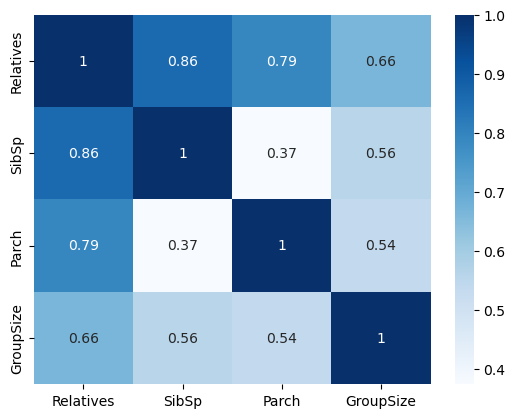

In [101]:
sns.heatmap(data[['Relatives', 'SibSp', 'Parch', 'GroupSize']
                 ].corr(), annot=True, cmap='Blues')
plt.show()

<a name="sozinho"></a>


### Criar Parâmetro "Sozinho"_(Feature Engeneering)_

Pessoa que não está com nenhum familiar

<br>

[início](#topo)


In [102]:
alone = data['Relatives'] == 0

In [103]:
data['Alone'] = alone.map({
    True: 1,
    False: 0
})

In [104]:
data.shape

(1309, 24)

## Atualizar train e test


In [105]:
train.shape

(891, 11)

In [106]:
train = data.loc[train.index]

In [107]:
train.shape

(891, 24)

In [108]:
test.shape

(418, 10)

In [109]:
test = data.loc[test.index]

In [110]:
test.shape

(418, 24)

In [111]:
test.drop('Survived', axis=1, inplace=True)

In [112]:
test.shape

(418, 23)

In [113]:
train.isnull().sum()

Fare                      0
Parch                     0
SibSp                     0
Survived                  0
GroupSize                 0
GroupSurvival             0
Pclass_2                  0
Pclass_3                  0
Embarked_Q                0
Embarked_S                0
Title_Miss                0
Title_Mr                  0
Title_Mrs                 0
Title_Others              0
LifeExpectancy_live       0
LifeExpectancy_unknown    0
Sex_male                  0
Age                       0
AgeGroup_(16.0, 32.0]     0
AgeGroup_(32.0, 48.0]     0
AgeGroup_(48.0, 64.0]     0
AgeGroup_(64.0, 80.0]     0
Relatives                 0
Alone                     0
dtype: int64

In [114]:
test.isnull().sum()

Fare                      0
Parch                     0
SibSp                     0
GroupSize                 0
GroupSurvival             0
Pclass_2                  0
Pclass_3                  0
Embarked_Q                0
Embarked_S                0
Title_Miss                0
Title_Mr                  0
Title_Mrs                 0
Title_Others              0
LifeExpectancy_live       0
LifeExpectancy_unknown    0
Sex_male                  0
Age                       0
AgeGroup_(16.0, 32.0]     0
AgeGroup_(32.0, 48.0]     0
AgeGroup_(48.0, 64.0]     0
AgeGroup_(64.0, 80.0]     0
Relatives                 0
Alone                     0
dtype: int64

## Utilizar train para treinar o modelo


In [115]:
X = train.drop('Survived', axis=1)

In [116]:
y = train['Survived']

In [117]:
X.shape, y.shape

((891, 23), (891,))

### Escolher colunas


In [118]:
X.columns

Index(['Fare', 'Parch', 'SibSp', 'GroupSize', 'GroupSurvival', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Others', 'LifeExpectancy_live',
       'LifeExpectancy_unknown', 'Sex_male', 'Age', 'AgeGroup_(16.0, 32.0]',
       'AgeGroup_(32.0, 48.0]', 'AgeGroup_(48.0, 64.0]',
       'AgeGroup_(64.0, 80.0]', 'Relatives', 'Alone'],
      dtype='object')

In [119]:
resources = ['Fare', 'Parch', 'SibSp', 'GroupSize', 'GroupSurvival', 'Pclass_2',
             'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
             'Title_Mrs', 'Title_Others', 'LifeExpectancy_live',
             'LifeExpectancy_unknown', 'Sex_male', 'Age', 'AgeGroup_(16.0, 32.0]',
             'AgeGroup_(32.0, 48.0]', 'AgeGroup_(48.0, 64.0]',
             'AgeGroup_(64.0, 80.0]', 'Relatives', 'Alone']

In [120]:
X = X[resources]

### Averiguando Shapes


In [121]:
X.shape, y.shape

((891, 23), (891,))

### Importar train_test_split para dividir e preparar para treino


In [122]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar


In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123)

In [124]:
X_train.shape, y_train.shape

((623, 23), (623,))

In [125]:
X_test.shape, y_test.shape

((268, 23), (268,))

<a name="ml"></a>


# Machine Learning <a name="modelospred"></a>

<br>

[início](#topo)


## Importando Modelos Preditivos


In [126]:
from sklearn.ensemble import (AdaBoostClassifier,
                              GradientBoostingClassifier,
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a name="LogisticRegression"></a>


### Criar classe ModeloAuxiliar

Uma classe modelo para evitar duplicação de códigos


In [175]:
class AuxiliaryModel(object):
    def __init__(self, clf, seed=123, params=None, max_iter=None):
        if params:
            params['random_state'] = seed
            if max_iter is not None:
                params['max_iter'] = max_iter
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def predict(self, x):
        return self.clf.predict(x)

    def fit(self, x, y):
        return self.clf.fit(x, y)

    def feature_importance(self, x, y):
        self.clf.fit(x, y)
        return self.clf.feature_importances_

    def score(self, x, y):
        return self.clf.score(x, y)

In [129]:
models = [{'name': 'logreg',
           'model': LogisticRegression},
          {'name': 'etree',
           'model': ExtraTreesClassifier},
          {'name': 'gradboost',
           'model': GradientBoostingClassifier},
          {'name': 'adaboost',
           'model': AdaBoostClassifier},
          {'name': 'SVC',
           'model': SVC},
          {'name': 'KNN',
           'model': KNeighborsClassifier},
          {'name': 'GaussianNB',
           'model': GaussianNB},
          {'name': 'Perceptron',
           'model': Perceptron},
          {'name': 'LinearSVC',
           'model': LinearSVC},
          {'name': 'SGD',
           'model': SGDClassifier},
          {'name': 'Dtree',
           'model': DecisionTreeClassifier},
          {'name': 'RForest',
           'model': RandomForestClassifier}
          ]

In [130]:
results = []
for model in models:
    x = AuxiliaryModel(clf=model['model'], max_iter=200)

    x.fit(X_train, y_train)

    x_pred = x.predict(X_test)

    accuracy = round(x.score(X_test, y_test)*100, 2)

    results.append({
        'name': model['name'],
        'score': accuracy,
        'pred': x_pred
    })

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<a name="ranking"></a>


# Ranking de Modelos Por Score

<br>

[início](#topo)


In [131]:
models_results = pd.DataFrame(results)

In [132]:
models_results[['name', 'score']].sort_values(by='score', ascending=False)

,name,score
2,gradboost,91.42
8,LinearSVC,90.67
3,adaboost,90.30
0,logreg,89.93
11,RForest,89.18
9,SGD,86.19
1,etree,84.33
6,GaussianNB,83.96
10,Dtree,83.21
5,KNN,75.37


# Validação Cruzada _(Cross-Validation)_

<br>

[início](#topo)


In [133]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [134]:
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

In [135]:
ada = AdaBoostClassifier(n_estimators=200, random_state=123, learning_rate=0.01,
                         algorithm="SAMME")

In [136]:
result = cross_val_score(ada, X_train, y_train, cv=kfold, scoring='accuracy')

print('The score of the AdaBoost model cross validated is:', result.mean())

The score of the AdaBoost model cross validated is: 0.8891193036354327


In [137]:
result

array([0.93650794, 0.9047619 , 0.9047619 , 0.91935484, 0.90322581,
       0.90322581, 0.85483871, 0.91935484, 0.83870968, 0.80645161])

In [138]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=200,
                   random_state=123)

In [139]:
ada_pred = ada.predict(X_test)
ada_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="matrix"></a>


# Matriz de Confusão

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

<br>

[início](#topo)


In [140]:
from sklearn.metrics import confusion_matrix

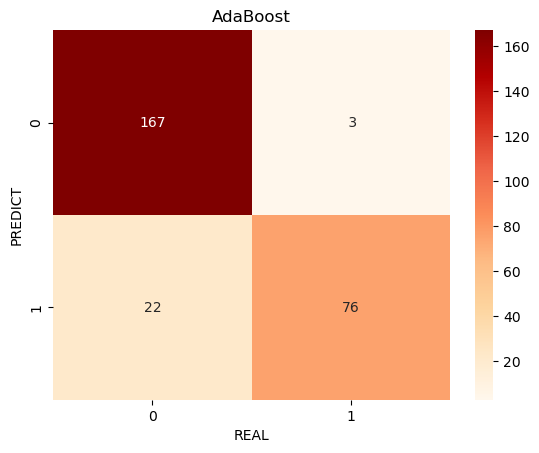

In [141]:
sns.heatmap(confusion_matrix(y_test, ada_pred),
            cmap='OrRd', annot=True, fmt='2.0f')
plt.title('AdaBoost')
plt.ylabel('PREDICT')
plt.xlabel('REAL')
plt.show()

### Interpretando a Matriz de Confusão

A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

- O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

- **Erros**
  - Classificou erradamente **3 como mortos (falso negativo)**
  - E **22 como vivos (falso positivo)**


<a name="precision"></a>


$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$


<a name="accuracy"></a>


$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$


<a name="accuracy"></a>


$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$


<a name="accuracy"></a>


$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$


### Importando métricas do Sklearn


In [142]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

### Revocação


In [143]:
recall_score(y_test, ada_pred)

0.7755102040816326

### Acuracidade


In [144]:
accuracy_score(y_test, ada_pred)

0.9067164179104478

### Precisão


In [145]:
precision_score(y_test, ada_pred)

0.9620253164556962

### F1-Score


In [146]:
f1_score(y_test, ada_pred)

0.8587570621468926

<a name="rocauc"></a>


# Curvas ROC e AUC


O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos.

- O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos.
- Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

<br>

[início](#topo)


In [147]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem habilidade: ROU AUC = 0.500
AdaBoost: ROU AUC = 0.883


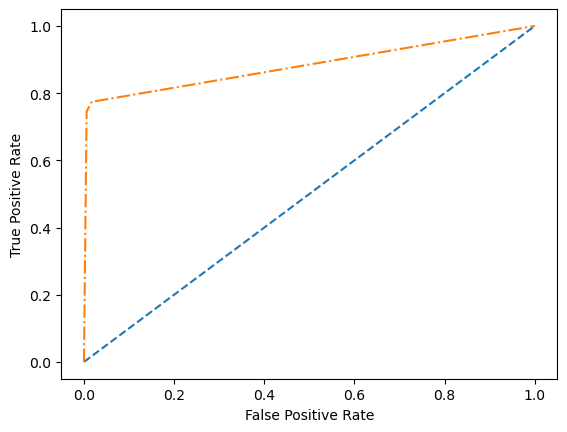

In [148]:
ns_prob = [0 for _ in range(len(y_test))]

ada_prob = ada.predict_proba(X_test)

ada_prob = ada_prob[:, 1]

ns_auc = roc_auc_score(y_test, ns_prob)

ada_auc = roc_auc_score(y_test, ada_prob)

print(f'Sem habilidade: ROU AUC = {ns_auc:.3f}')
print(f'AdaBoost: ROU AUC = {ada_auc:.3f}')

ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_prob)
ada_tfp, ada_tvp, _ = roc_curve(y_test, ada_prob)

plt.plot(ns_tfp, ns_tvp, linestyle='--', label='No Skill')
plt.plot(ada_tfp, ada_tvp, linestyle='-.', label='AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Selecionando Threshold (Limite)


In [149]:
pred_prob = ada_prob >= 0.5

In [150]:
pred_prob = pd.Series(pred_prob).map({
    True: 1,
    False: 0
}).values
pred_prob

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1])

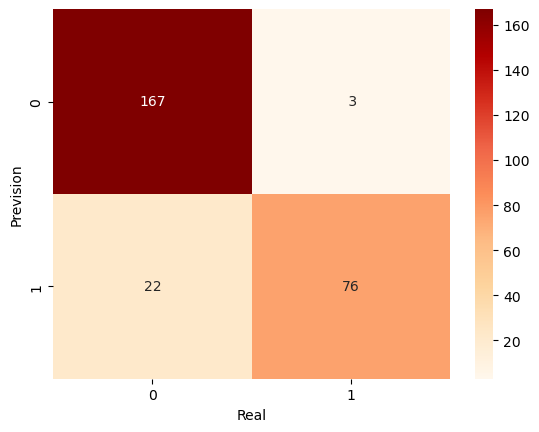

In [151]:
sns.heatmap(confusion_matrix(y_test, pred_prob), cmap='OrRd',  # type:ignore
            annot=True, fmt='2.0f')
plt.ylabel('Prevision')
plt.xlabel('Real')
plt.show()

<a name="hyperparam"></a>


# Customização de Hyper-Parâmetros

<br>

[início](#topo)


**Parâmetros**

**n_jobs**: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

**n_estimators**: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão)

**max_depth**: Profundidade de árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar _(overfit)_ o modelo.

**min_samples_leaf**: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

**verbose**: Controla a saída de textos durante o processo de aprendizagem/treino. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração.


In [152]:
from sklearn.model_selection import GridSearchCV

- ### Random Forest


In [153]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [2, 4],
    'min_samples_leaf': [1, 2, 3],
}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                  param_grid=rf_params, verbose=True)

gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8908903225806452
RandomForestClassifier(max_depth=2, n_estimators=200, random_state=123)


In [154]:
gd_pred = gd.predict(X_test)
gd_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="ensembling"></a>


# Ensembling

Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:

- Classificão de Votos (Voting Classifier)
- Ensacamento (Bagging)
- Impulsionamento (Boosting)

<br>

[início](#topo)


<a name="voting"></a>


- ### Classificação de Votos


In [155]:
mixed = [('KNN', KNeighborsClassifier(n_neighbors=10)),
         ('RBF', SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
         ('RFor', RandomForestClassifier(n_estimators=100, random_state=123)),
         ('LR', LogisticRegression(C=0.05)),
         ('DT', DecisionTreeClassifier(random_state=123)),
         ('NB', GaussianNB()),
         ('svm', SVC(kernel='linear', probability=True))
         ]

In [156]:
from sklearn.ensemble import VotingClassifier

my_ensemble = VotingClassifier(
    estimators=mixed, voting='soft').fit(X_train, y_train)
print('Score', my_ensemble.score(X_test, y_test))
cross = cross_val_score(my_ensemble, X_test, y_test, cv=10, scoring='accuracy')
print('Cross-validated score', cross)

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score 0.8880597014925373


/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Cross-validated score [0.96296296 0.96296296 0.81481481 0.85185185 0.88888889 0.92592593
 0.85185185 0.77777778 0.92307692 0.88461538]


In [157]:
cross.mean()

0.8844729344729345

<a name="bagging"></a>


- ### Ensacamento

  O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade.

- #### Ensacamento KNN
  Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.


In [158]:
from sklearn.ensemble import BaggingClassifier

In [159]:
dtree = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=7),
                          random_state=123, n_estimators=100)

dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

print('Score', dtree.score(X_test, y_test))
cross = cross_val_score(dtree, X_test, y_test, cv=10, scoring='accuracy')
print('Cross-validated score', cross.mean())

Score 0.7761194029850746
Cross-validated score 0.7273504273504274


- #### Ensacamento DecisionTree


In [160]:
dtree = BaggingClassifier(estimator=DecisionTreeClassifier(),
                          random_state=123, n_estimators=100)

dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

print('Score', dtree.score(X_test, y_test))
cross = cross_val_score(dtree, X_test, y_test, cv=10, scoring='accuracy')
print('Cross-validated score', cross.mean())

Score 0.8880597014925373
Cross-validated score 0.8773504273504275


<a name="boosting"></a>


- ### Impulsionamento

  Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua.

- #### Exemplos (Impulsionamento Adaptativo):
      * AdaBoost
      * GradientBoostingClassifier
  <br>

[início](#topo)


- ### GradientBoostingClassifier


In [161]:
grad = GradientBoostingClassifier(
    n_estimators=100, random_state=123, learning_rate=0.01)
grad.fit(X_train, y_train)
grad_pred = grad.predict(X_test)
print('Score', grad.score(X_test, y_test))
cross = cross_val_score(grad, X_test, y_test, cv=10, scoring='accuracy')
print('Cross-validated score', cross.mean())

Score 0.9029850746268657
Cross-validated score 0.8921652421652422


- ### Configurando Hyper-Parâmetros para o AdaBoost


In [162]:
n_estimator = [100, 200, 300, 400]
learn_rate = [0.01, 0.05, 0.1, 0.005, 0.005]
hyper = {
    'n_estimators': n_estimator,
    'learning_rate': learn_rate
}

gd = GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME'),
                  param_grid=hyper, verbose=True)

gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_params_)
print(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8908903225806452
{'learning_rate': 0.01, 'n_estimators': 100}
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=100)


In [163]:
adaboost_pred = gd.predict(X_test)

In [164]:
adaboost_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="combinado"></a>


<a name="fimportance"></a>


# Importância de Recursos _(Feature Importance)_

<br>

[início](#topo)


In [165]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_depth': 2,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [176]:
rf = AuxiliaryModel(clf=RandomForestClassifier, seed=123, params=rf_params)

In [177]:
rf_features = rf.feature_importance(X_train, y_train)

In [178]:
rf_features

array([2.32948800e-02, 3.76430767e-03, 1.72954536e-03, 1.00826057e-01,
       2.85872149e-01, 1.21745349e-03, 5.41081496e-02, 2.14005807e-04,
       3.92327845e-03, 4.29584153e-02, 9.81632988e-02, 6.09736574e-02,
       7.64993585e-04, 7.16879694e-02, 9.53862926e-03, 2.05395474e-01,
       1.46865729e-02, 1.53095057e-03, 5.13024145e-04, 0.00000000e+00,
       2.43682721e-05, 1.36937271e-02, 5.11909215e-03])

In [182]:
cols = X_train.columns.values
cols

array(['Fare', 'Parch', 'SibSp', 'GroupSize', 'GroupSurvival', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Others', 'LifeExpectancy_live',
       'LifeExpectancy_unknown', 'Sex_male', 'Age',
       'AgeGroup_(16.0, 32.0]', 'AgeGroup_(32.0, 48.0]',
       'AgeGroup_(48.0, 64.0]', 'AgeGroup_(64.0, 80.0]', 'Relatives',
       'Alone'], dtype=object)

In [186]:
feature_dataframe = pd.DataFrame({
    'Features': cols,
    'ImportanceOfRForestFeatures': rf_features,
})

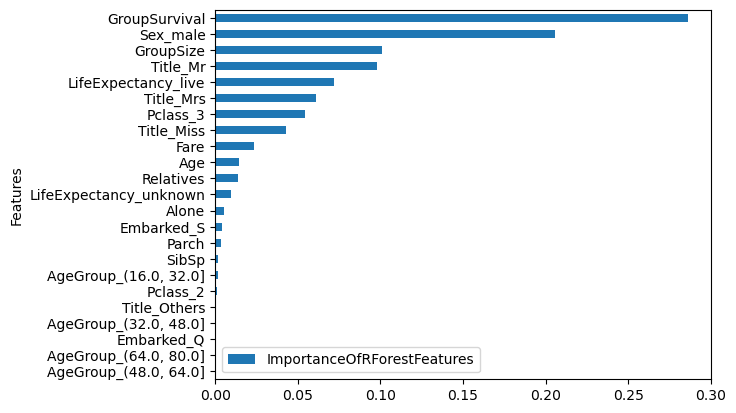

In [190]:
feature_dataframe.sort_values(
    by='ImportanceOfRForestFeatures').plot.barh(x='Features')
plt.show()

In [191]:
my_ensemble.fit(X_train, y_train)

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.1, probability=True)),
                             ('RFor', RandomForestClassifier(random_state=123)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=123)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [192]:
my_ensemble.score(X_test, y_test)

0.8955223880597015

In [193]:
ensemble_pred = my_ensemble.predict(test[resources])

In [194]:
ensemble_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1.

In [195]:
ensemble_pred.shape  # type: ignore

(418,)

In [197]:
test.index

Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
       ...
       1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
      dtype='int64', name='PassengerId', length=418)

<a name="submissao"></a>


# Submissão

<br>

[início](#topo)


In [198]:
submission = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': ensemble_pred,
})

In [200]:
submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [201]:
submission.shape

(418, 2)

In [203]:
submission['Survived'] = submission['Survived'].astype('int')

In [205]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [207]:
submission.to_csv('my_ensemble.csv', index=False)